# Prevendo Nota de Matemática do Enem 2016

#### O objetivo deste desafio é prever a nota da disciplina de matemática dos participantes do enem 2016. Foram utilizadas técnicas de transformação nos dados adquiridos e após finalizar a limpeza foram avaliados algoritmos de regressão para saber quais poderiam ser utilizados para concluir a tarefa.

#### Este desafio se encontra no programa AceleraDev DataScience da empresa Codenation e foi disponibilizado a todos os participantes.

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
import numpy as np
import sklearn.metrics as metrics

## Identificação dos dados

In [39]:
# Importando os dados de treino e teste
df_train = pd.read_csv('train.csv', sep=",", encoding="utf-8", header=0)
df_test = pd.read_csv('test.csv', sep=",", encoding="utf-8", header=0)

In [40]:
#verificando colunas
df_train.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [41]:
#formatação dos dados
df_train.shape

(13730, 167)

In [42]:
#verificando registros nulos por coluna(sem omitir registros)
dict(df_train.isnull().sum())

{'Unnamed: 0': 0,
 'NU_INSCRICAO': 0,
 'NU_ANO': 0,
 'CO_MUNICIPIO_RESIDENCIA': 0,
 'NO_MUNICIPIO_RESIDENCIA': 0,
 'CO_UF_RESIDENCIA': 0,
 'SG_UF_RESIDENCIA': 0,
 'NU_IDADE': 0,
 'TP_SEXO': 0,
 'TP_ESTADO_CIVIL': 528,
 'TP_COR_RACA': 0,
 'TP_NACIONALIDADE': 0,
 'CO_MUNICIPIO_NASCIMENTO': 609,
 'NO_MUNICIPIO_NASCIMENTO': 609,
 'CO_UF_NASCIMENTO': 609,
 'SG_UF_NASCIMENTO': 609,
 'TP_ST_CONCLUSAO': 0,
 'TP_ANO_CONCLUIU': 0,
 'TP_ESCOLA': 0,
 'TP_ENSINO': 9448,
 'IN_TREINEIRO': 0,
 'CO_ESCOLA': 9448,
 'CO_MUNICIPIO_ESC': 9448,
 'NO_MUNICIPIO_ESC': 9448,
 'CO_UF_ESC': 9448,
 'SG_UF_ESC': 9448,
 'TP_DEPENDENCIA_ADM_ESC': 9448,
 'TP_LOCALIZACAO_ESC': 9448,
 'TP_SIT_FUNC_ESC': 9448,
 'IN_BAIXA_VISAO': 0,
 'IN_CEGUEIRA': 0,
 'IN_SURDEZ': 0,
 'IN_DEFICIENCIA_AUDITIVA': 0,
 'IN_SURDO_CEGUEIRA': 0,
 'IN_DEFICIENCIA_FISICA': 0,
 'IN_DEFICIENCIA_MENTAL': 0,
 'IN_DEFICIT_ATENCAO': 0,
 'IN_DISLEXIA': 0,
 'IN_DISCALCULIA': 0,
 'IN_AUTISMO': 0,
 'IN_VISAO_MONOCULAR': 0,
 'IN_OUTRA_DEF': 0,
 'IN_SABATIST

In [43]:
#calculando percentual de registros nulos por coluna(sem omitir registros)
dict(df_train.isnull().sum() / df_train.shape[0])

{'Unnamed: 0': 0.0,
 'NU_INSCRICAO': 0.0,
 'NU_ANO': 0.0,
 'CO_MUNICIPIO_RESIDENCIA': 0.0,
 'NO_MUNICIPIO_RESIDENCIA': 0.0,
 'CO_UF_RESIDENCIA': 0.0,
 'SG_UF_RESIDENCIA': 0.0,
 'NU_IDADE': 0.0,
 'TP_SEXO': 0.0,
 'TP_ESTADO_CIVIL': 0.038455935906773486,
 'TP_COR_RACA': 0.0,
 'TP_NACIONALIDADE': 0.0,
 'CO_MUNICIPIO_NASCIMENTO': 0.044355426074289876,
 'NO_MUNICIPIO_NASCIMENTO': 0.044355426074289876,
 'CO_UF_NASCIMENTO': 0.044355426074289876,
 'SG_UF_NASCIMENTO': 0.044355426074289876,
 'TP_ST_CONCLUSAO': 0.0,
 'TP_ANO_CONCLUIU': 0.0,
 'TP_ESCOLA': 0.0,
 'TP_ENSINO': 0.6881281864530225,
 'IN_TREINEIRO': 0.0,
 'CO_ESCOLA': 0.6881281864530225,
 'CO_MUNICIPIO_ESC': 0.6881281864530225,
 'NO_MUNICIPIO_ESC': 0.6881281864530225,
 'CO_UF_ESC': 0.6881281864530225,
 'SG_UF_ESC': 0.6881281864530225,
 'TP_DEPENDENCIA_ADM_ESC': 0.6881281864530225,
 'TP_LOCALIZACAO_ESC': 0.6881281864530225,
 'TP_SIT_FUNC_ESC': 0.6881281864530225,
 'IN_BAIXA_VISAO': 0.0,
 'IN_CEGUEIRA': 0.0,
 'IN_SURDEZ': 0.0,
 'IN_DEFICI

`A informação do percentual de dados faltantes pode indicar a possibilidade do tratamento de exclusão dos dados faltantes, mas antes serão selecionadas algumas variáveis para trabalhar o modelo.`

## Verificando correlações das features

`Para selecionar as features necessárias ao modelo será utilizado o cálculo das correlações, mantendo como parâmetro a correlação com a coluna NU_NOTA_MT.`

In [44]:
#obtendo correlações das variávies
correlations = df_train.corr()

In [106]:
#separando features com 50% ou mais de correlação(positiva ou negativa) a NU_NOTA_MT
features_filter = correlations[(correlations['NU_NOTA_MT'] <= -0.5) | (correlations['NU_NOTA_MT'] >= 0.5) & (correlations['NU_NOTA_MT'] < 1.0)]['NU_NOTA_MT']
features_filter

NU_NOTA_CN    0.584941
NU_NOTA_CH    0.529594
Name: NU_NOTA_MT, dtype: float64

In [46]:
#separando features com 40% ou mais de correlação(positiva ou negativa) a NU_NOTA_MT
features_filter = correlations[(correlations['NU_NOTA_MT'] <= -0.4) | (correlations['NU_NOTA_MT'] >= 0.4) & (correlations['NU_NOTA_MT'] < 1.0)]['NU_NOTA_MT']
features_filter

NU_NOTA_CN    0.584941
NU_NOTA_CH    0.529594
NU_NOTA_LC    0.494695
Name: NU_NOTA_MT, dtype: float64

In [47]:
#separando features com 30% ou mais de correlação(positiva ou negativa) a NU_NOTA_MT
features_filter = correlations[(correlations['NU_NOTA_MT'] <= -0.3) | (correlations['NU_NOTA_MT'] >= 0.3) & (correlations['NU_NOTA_MT'] < 1.0)]['NU_NOTA_MT']
features_filter

TP_DEPENDENCIA_ADM_ESC    0.373233
NU_NOTA_CN                0.584941
NU_NOTA_CH                0.529594
NU_NOTA_LC                0.494695
NU_NOTA_COMP2             0.335638
NU_NOTA_COMP3             0.350307
NU_NOTA_COMP4             0.342282
NU_NOTA_COMP5             0.343337
NU_NOTA_REDACAO           0.379376
Name: NU_NOTA_MT, dtype: float64

<AxesSubplot:>

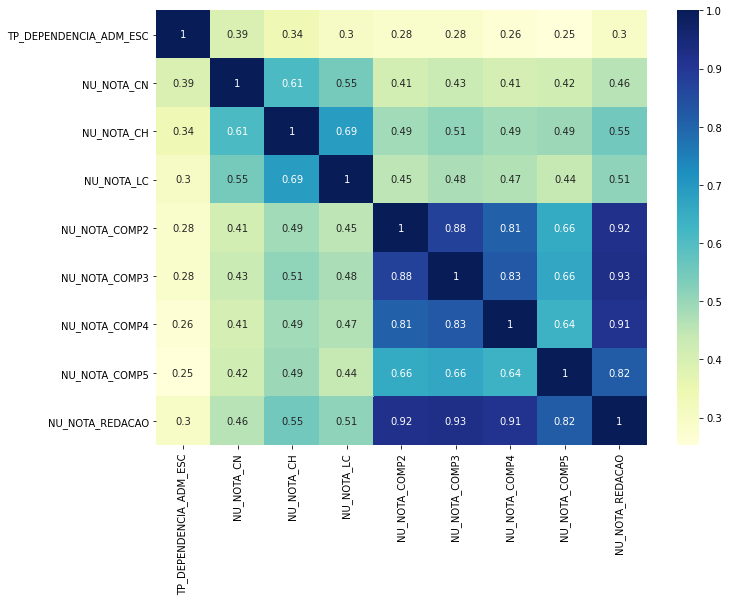

In [50]:
#Plotando gráfico de correlações
figure = plt.subplots(figsize=(11, 8))
sns.heatmap(df_train[features_filter.index.to_list()].corr(), annot=True, annot_kws={"size": 10}, cmap="YlGnBu")

`Avaliando os percentuas de correlação e a quantidade de features selecionadas será utilizado o valor de 30% para obter uma quantidade significativa de features. O valor de 30% seria baixo para uma boa correlação, mas neste dataset especifico pode trazer bons resultados.`

In [59]:
#lista de features selecionadas
features = features_filter.index.to_list()
features

['TP_DEPENDENCIA_ADM_ESC',
 'NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_REDACAO']

In [60]:
#adicionando a feature NU_NOTA_MT
features.append('NU_NOTA_MT')
features

['TP_DEPENDENCIA_ADM_ESC',
 'NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_REDACAO',
 'NU_NOTA_MT']

In [61]:
#verificando valores vazios nas features
df_train[features].isnull().sum(), df_train[features].isnull().sum() / df_train[features].shape[0]

(TP_DEPENDENCIA_ADM_ESC    9448
 NU_NOTA_CN                3389
 NU_NOTA_CH                3389
 NU_NOTA_LC                3597
 NU_NOTA_COMP2             3597
 NU_NOTA_COMP3             3597
 NU_NOTA_COMP4             3597
 NU_NOTA_COMP5             3597
 NU_NOTA_REDACAO           3597
 NU_NOTA_MT                3597
 dtype: int64,
 TP_DEPENDENCIA_ADM_ESC    0.688128
 NU_NOTA_CN                0.246832
 NU_NOTA_CH                0.246832
 NU_NOTA_LC                0.261981
 NU_NOTA_COMP2             0.261981
 NU_NOTA_COMP3             0.261981
 NU_NOTA_COMP4             0.261981
 NU_NOTA_COMP5             0.261981
 NU_NOTA_REDACAO           0.261981
 NU_NOTA_MT                0.261981
 dtype: float64)

`Ao avaliar que os dados faltantes tem percentual maior que 20% nas features selecionadas é descartada a possibilidade de exclusão dos registros, pois isso poderá afetar o treinamento do modelo por ter uma quantidade reduzida de dados. A estratégia adotada será o preenchimento dos valores faltantes.`

## Preparando os dados

`Como a presente avaliação é sobre os dados do Enem e quase todas as features são notas das disciplinas a escolha inicial é substituir as notas faltantes por zero. Uma observação seria que a variável TP_DEPENDENCIA_ADM_ESC diz respeito a dependência administrativa do estabelecimento escolar do canditato(Federal, Estadual, Municipal ou Privada), ou seja, é uma variável categorica, neste caso sibstituí-la por zero indica categoria inexistente.`

In [62]:
#copiando o Dataframe para manter o original sem alteração
df_train_copy = df_train.copy()
df_test_copy = df_test.copy()

In [63]:
#preenchendo valores faltantes com zero
df_train_copy.fillna(0, inplace=True)
df_test_copy.fillna(0, inplace=True)
df_train_copy[features].isnull().sum(), df_train_copy[features].isnull().sum() / df_train_copy[features].shape[0]

(TP_DEPENDENCIA_ADM_ESC    0
 NU_NOTA_CN                0
 NU_NOTA_CH                0
 NU_NOTA_LC                0
 NU_NOTA_COMP2             0
 NU_NOTA_COMP3             0
 NU_NOTA_COMP4             0
 NU_NOTA_COMP5             0
 NU_NOTA_REDACAO           0
 NU_NOTA_MT                0
 dtype: int64,
 TP_DEPENDENCIA_ADM_ESC    0.0
 NU_NOTA_CN                0.0
 NU_NOTA_CH                0.0
 NU_NOTA_LC                0.0
 NU_NOTA_COMP2             0.0
 NU_NOTA_COMP3             0.0
 NU_NOTA_COMP4             0.0
 NU_NOTA_COMP5             0.0
 NU_NOTA_REDACAO           0.0
 NU_NOTA_MT                0.0
 dtype: float64)

`Sem valores faltantes nas variáveis é possível avaliar os modelos com base nas features escolhidas.`

## Avaliação dos modelos para previsão das notas

`Nos problemas de previsão de valores é bastante comum a utilização de algoritmos de Regressão, para esta avaliação os seguintes algoritmos foram utilizados:` </br>
- `LinearRegression`<br>
- `KNeighborsRegressor`</br>
- `DecisionTreeRegressor`</br>
- `GradientBoostRegressor`</br>
- `RandomForestRegressor` 

In [86]:
#Gerando DataFrame de Resposta
prediction = pd.DataFrame()
prediction['NU_INSCRICAO'] = df_test_copy['NU_INSCRICAO']

In [109]:
#método de avaliação dos modelos
def models_performance(pipelines, X_train, y_train):
    """ 
    Avaliar a performance dos modelos aplicados aos dados de treino.\n
    
    Parameters\n
    -----------\n
    pipelines: Lista de pipelines aplicados aos dados de treino.\n
    X_train: Conjunto de dados de treino.\n
    y_train: Variável target para treinamento.\n
    
    Return\n
    -----------\n
    Avaliação dos modelos utilizados.\n
    
    """
    for name, model in pipelines:
        kfold = KFold(n_splits=5, random_state=21, shuffle=True)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
        print("%s: Mean = %f , Std = (%f)" % (name, cv_results.mean(), cv_results.std()))
        print(cv_results)
        print('')

In [70]:
#Criando os pipelines para aplicação dos dados de treino
pipelines = []
pipelines.append(('LR', Pipeline([('Scaler', MinMaxScaler()),('LR',LinearRegression())])))
pipelines.append(('KNN', Pipeline([('Scaler', MinMaxScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('DTR', Pipeline([('Scaler', MinMaxScaler()),('DTR', DecisionTreeRegressor())])))
pipelines.append(('GBM', Pipeline([('Scaler', MinMaxScaler()),('GBM', GradientBoostingRegressor())])))
pipelines.append(('RFR', Pipeline([('Scaler', MinMaxScaler()),('RFR', RandomForestRegressor())])))

In [73]:
#removendo a variável target da lista de features escolhidas
features.remove('NU_NOTA_MT')

In [78]:
#Avaliando os modelos escolhidos
models_performance(pipelines, df_train_copy[features], df_train_copy['NU_NOTA_MT'])

LR: Média -5101.872087 Desvio (135.658620)
[-5349.63220126 -5111.71702934 -4941.14016774 -5055.35332122
 -5051.51771483]

KNN: Média -5041.330622 Desvio (39.766364)
[-5025.73622083 -5033.73415688 -5028.33953809 -5001.18676402
 -5117.65643132]

DTR: Média -8251.825476 Desvio (237.692425)
[-8260.83090677 -8351.17054625 -8443.41289512 -7792.94650765
 -8410.76652221]

GBM: Média -4051.871060 Desvio (47.703685)
[-4127.22757322 -4066.66225388 -4048.30302646 -3979.2548424
 -4037.90760224]

RFR: Média -4325.413011 Desvio (81.917769)
[-4432.03881415 -4341.50702487 -4271.23950701 -4199.92456611
 -4382.3551442 ]



`Quando se fala em modelos de regressão uma métrica de avaliação muito comum é o erro médio quadrático, quanto mais ele se aproxima de zero melhor é a acertividade do modelo. 
No método models_peformance foram avaliados os modelos contidos no pipeline, aplicando o MinMaxScaler como método de transformação dos dados para garantir uma alteração mínima na distribuição original. Avaliando a média dos scores, retornados pelo método cross_val_score, o desvio padrão e os próprios scores gerados em 5 dobras, pode-se perceber que os modelos que tiveram menor erro médio foram o GradientBoostingRegressor e o RandomForestRegressor.`

## Gerando os modelos

#### `GradientBoostingRegressor`

In [90]:
#Otimizando hyper parâmetros para a melhor configuração do modelo 
gradient = RandomizedSearchCV(estimator = pipelines[3][1], param_distributions = {}, cv = 5, return_train_score=True, verbose=0)

In [91]:
#Treinando o modelo
gradient.fit(df_train_copy[features], df_train_copy['NU_NOTA_MT'])

/home/osboxes/codenation/enem-2/venv/lib/python3.7/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('Scaler', MinMaxScaler()),
                                             ('GBM',
                                              GradientBoostingRegressor())]),
                   param_distributions={}, return_train_score=True)

In [92]:
#Aplicando o conjunto de teste
gradient_predict = gradient.predict(df_test_copy[features])
gradient_predict

array([4.33917605e+02, 4.54041216e+02, 5.84561728e+02, ...,
       6.64767053e+02, 4.50318972e+02, 5.16341356e-01])

In [94]:
#arredondando valores preditos e salvando no DataFrame de resposta
prediction['NU_NOTA_MT'] = np.around(gradient_predict,2)

In [95]:
#gerando arquivo de resposta
prediction.to_csv('answer.csv', index=False, header=True)

#### `RandomForestRegressor`

In [98]:
forest = RandomizedSearchCV(estimator = pipelines[4][1], param_distributions = {}, cv = 5, return_train_score=True, verbose=0)

In [99]:
#Treinando o modelo
forest.fit(df_train_copy[features], df_train_copy['NU_NOTA_MT'])

/home/osboxes/codenation/enem-2/venv/lib/python3.7/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('Scaler', MinMaxScaler()),
                                             ('RFR', RandomForestRegressor())]),
                   param_distributions={}, return_train_score=True)

In [101]:
#Predizendo os valores
forest_predict = forest.predict(df_test_copy[features])
forest_predict

array([429.224, 432.394, 573.89 , ..., 671.851, 486.532,   0.   ])

In [102]:
#Alterando os dados de resposta
prediction['NU_NOTA_MT'] = np.around(forest_predict,2)

In [103]:
#Gerando o arquivo da predição
prediction.to_csv('answer2.csv', index=False, header=True)

## Conclusão

`O objetivo deste desafio é a previsão das notas das disciplinas de matemática do enem 2016, após as técnicas aplicadas dois algoritmos de regressão se mostraram eficientes para resolver o problema, o GradientBoostRegressor e o RandomForestRegressor, dentre os modelos gerados o que teve um percentual de acertividade maior no problema testado foi o modelo baseado no algoritmo GradientBoostRegressor e por isso este foi escolhido para gerar o arquivo de resposta.`